In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [62]:
penguins_df = pd.read_csv('penguins_size.csv')

penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [63]:
penguins_df = penguins_df.drop(columns=['species', 'island'])

penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [64]:
penguins_df.isnull().sum()

culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [65]:
penguins_df.dropna(inplace=True)

In [66]:
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [67]:
penguins_df = pd.get_dummies(penguins_df, dtype='int')

penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,1,0
340,46.8,14.3,215.0,4850.0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,1,0


In [46]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [81]:
penguins_df.shape

(334, 7)

In [25]:
scaler = StandardScaler()

In [69]:
X = scaler.fit_transform(penguins_df)

penguins_preprocessed = pd.DataFrame(data = X, columns = penguins_df.columns)

penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,-0.897653,0.783487,-1.429521,-0.571229,-0.0548,-0.988095,0.994030
1,-0.824290,0.121896,-1.072408,-0.509011,-0.0548,1.012049,-1.006006
2,-0.677564,0.427246,-0.429605,-1.193405,-0.0548,1.012049,-1.006006
3,-1.337831,1.088836,-0.572450,-0.944535,-0.0548,1.012049,-1.006006
4,-0.860972,1.750427,-0.786718,-0.695664,-0.0548,-0.988095,0.994030


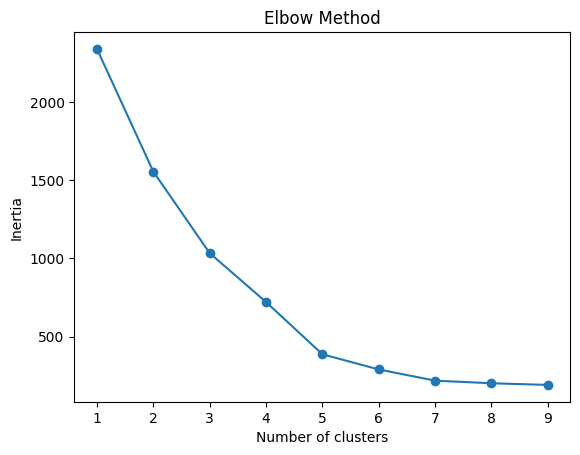

In [82]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [83]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_


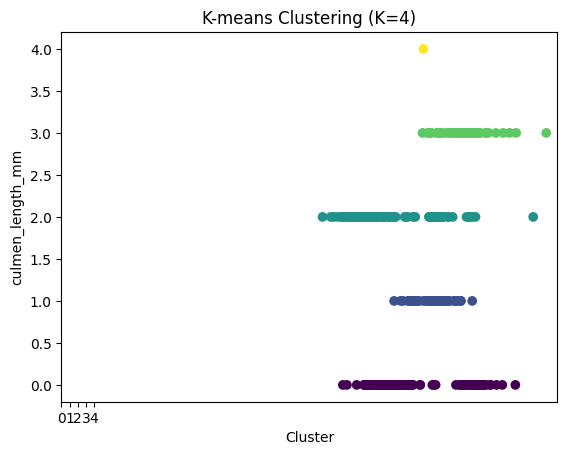

In [88]:
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['label'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={4})')
# plt.show()
plt.show()